# Using Regression to identify feature parameters that best predict labels

May 30, 2018

Predict home prices based on a data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2,930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. The following questions are explored:

- Which properties of a house most affect the final sale price?
- How effectively can we predict the sale price from just a home's properties?

About the data --> http://ww2.amstat.org/publications/jse/v19n3/decock.pdf

Solution Cell --> 108

# Read in and explore the data ...

In [59]:

import pandas as pd
import numpy as np
data = pd.read_table('AmesHousing.txt',sep='\t')


In [60]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [61]:
target = 'SalePrice'

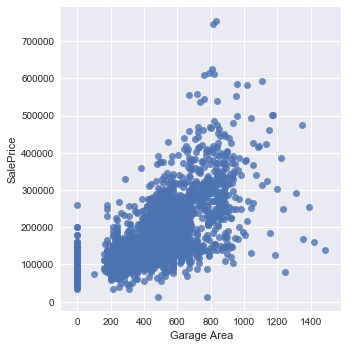

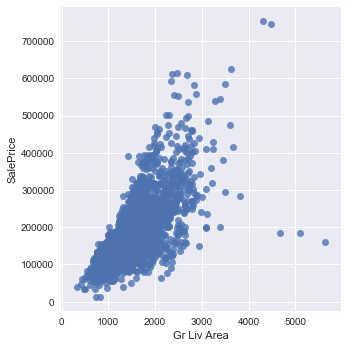

In [62]:
#Visualize data - try plotting Garage Area and Gr Liv Area against SalePrice
#Neat seaborn link -> https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/
import seaborn as sns
sns.set(color_codes=True)
sns.lmplot('Garage Area', 'SalePrice', data=data, fit_reg=False)
sns.lmplot('Gr Liv Area', 'SalePrice', data=data, fit_reg=False)

In [63]:
# Try regressing through Gr Liv Area data

In [64]:
# try finding parameter to Gr Liv Area
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

train = data[:1460]
test = data[1460:]

x_train = train[['Gr Liv Area']].values
y_train = train['SalePrice']
x_test = test[['Gr Liv Area']].values
y_test = test['SalePrice']

regr.fit(x_train,y_train)
a1 = regr.coef_
a0 = regr.intercept_

# The coefficients and intercept
print("Gr Liv Area Slope: %.2f" % regr.coef_)
print("Gr Liv Area Intercept: %.2f" % regr.intercept_)

Gr Liv Area Slope: 116.87
Gr Liv Area Intercept: 5366.82


In [65]:
predic_ytrain = regr.predict(x_train)
predic_ytest = regr.predict(x_test)

In [66]:
predic_ytrain


array([198897.32645574, 110078.97886714, 160682.06374328, ...,
       221803.11083385, 242722.16901591, 269835.13827979])

In [67]:
predic_ytest

array([232905.40428243, 214089.93854327, 272990.52694413, ...,
       118727.08113235, 167694.0385529 , 239099.31536427])

In [68]:
print("RMSE predicted training sale price based on Gr Liv Area: %.2f"
      %(np.mean((predic_ytrain - y_train) ** 2))**0.5)

RMSE predicted training sale price based on Gr Liv Area: 56034.36


In [69]:
print("RMSE predicted test sale price based on Gr Liv Area: %.2f"
      %(np.mean((predic_ytest - y_test) ** 2))**0.5)

RMSE predicted test sale price based on Gr Liv Area: 57088.25


In [70]:
(np.mean((predic_ytrain - y_train) ** 2))**0.5

56034.36200141283

In [71]:
print("R2 score %.2f" % regr.score(x_test, y_test))

R2 score 0.51


Text(0,0.5,'Sales Price')

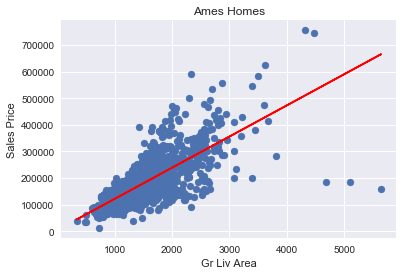

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x_test, y_test)
plt.plot(x_test, regr.predict(x_test), color = 'red')
plt.title('Ames Homes')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sales Price')

# Multiple Linear Regression on two columns

In [73]:
cols = ['Overall Cond', 'Gr Liv Area']

train = data[:1460]
test = data[1460:]

x_train = train.as_matrix(columns=cols)
y_train = train['SalePrice']
x_test = test.as_matrix(columns=cols)
y_test = test['SalePrice']

regr.fit(x_train,y_train)

predic_ytrain = regr.predict(x_train)
predic_ytest = regr.predict(x_test)

print("RMSE predicted training sale price based on Overall Condition and Gr Liv Area: %.2f"
      %(np.mean((predic_ytrain - y_train) ** 2))**0.5)

print("RMSE predicted test sale price based on Overall Condition and Gr Liv Area: %.2f"
      %(np.mean((predic_ytest - y_test) ** 2))**0.5)

train_rmse_2 = (np.mean((predic_ytrain - y_train) ** 2))**0.5
test_rmse_2= (np.mean((predic_ytest - y_test) ** 2))**0.5



RMSE predicted training sale price based on Overall Condition and Gr Liv Area: 56032.40
RMSE predicted test sale price based on Overall Condition and Gr Liv Area: 57066.91


In [74]:
print("R2 score %.2f" %regr.score(x_test, y_test))

R2 score 0.51


In [75]:
# The coefficients and intercept
print("Overall Condition and Gr Liv Area Slopes: ")
print ([ "{:0,.2f}".format(x) for x in regr.coef_ ])
print("Intercept: ")
print("{0:,.2f}".format(regr.intercept_))

Overall Condition and Gr Liv Area Slopes: 
['-409.57', '116.73']
Intercept: 
7,858.69


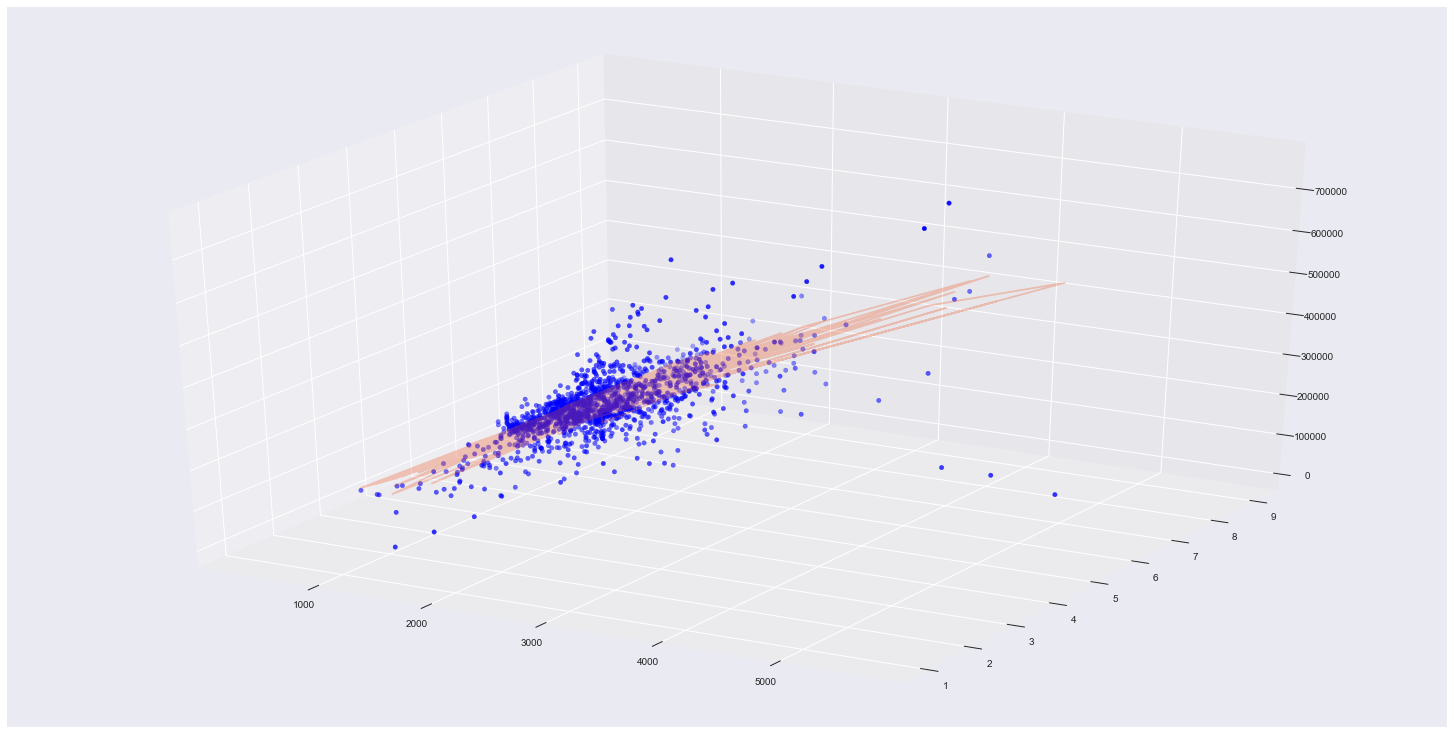

In [76]:
# attempt to plot

GrLivArea = test['Gr Liv Area'].values
OverallCond = test['Overall Cond'].values
SalePrice = test['SalePrice'].values

plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(GrLivArea, OverallCond, SalePrice, color='blue')
pred_yhat=regr.predict(x_test)
ax.plot(GrLivArea, OverallCond, pred_yhat, alpha = 0.3, color = '#ef5423')
plt.show()

# Try Multiple Regression on more features, non-numeric

- Feature Engineering
- Identify non-null numeric features in the dataset
- Exclude features that strongly correlate with other features to simplify model
- Examine the improvement or degradation of the R2 score

In [77]:
numerical_train = train.select_dtypes(include=['int','float'])
colname = ['PID','Year Built','Year Remod/Add','Garage Yr Blt','Mo Sold','Yr Sold']
numerical_train = numerical_train.drop(colname,axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = pd.Series()
for i,j in null_series.iteritems():
    if j == 0:
        full_cols_series[i] = j

In [78]:
# List of columns that are numeric - use this list to train model
full_cols_series

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64

In [79]:
train_subset = train[full_cols_series.index]

In [80]:
train_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
Order              1460 non-null int64
MS SubClass        1460 non-null int64
Lot Area           1460 non-null int64
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
1st Flr SF         1460 non-null int64
2nd Flr SF         1460 non-null int64
Low Qual Fin SF    1460 non-null int64
Gr Liv Area        1460 non-null int64
Full Bath          1460 non-null int64
Half Bath          1460 non-null int64
Bedroom AbvGr      1460 non-null int64
Kitchen AbvGr      1460 non-null int64
TotRms AbvGrd      1460 non-null int64
Fireplaces         1460 non-null int64
Garage Cars        1460 non-null float64
Garage Area        1460 non-null float64
Wood Deck SF       1460 non-null int64
Open Porch SF      1460 non-null int64
Enclosed Porch     1460 non-null int64
3Ssn Porch         1460 non-null int64
Screen Porch       1460 non-null int64
Pool Area          1460 non-nul

In [81]:
# test correlation 
train_subset[['Order','SalePrice']].corr()['SalePrice'][0]


-0.06818052508481719

In [82]:
train_subset.columns

Index(['Order', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'TotRms AbvGrd', 'Fireplaces', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [83]:
train_subset = train[full_cols_series.index]

In [84]:
sorted_corrs = train_subset.corr()['SalePrice'].abs().sort_values()

In [85]:
sorted_corrs.index

Index(['Misc Val', '3Ssn Porch', 'Low Qual Fin SF', 'Order', 'MS SubClass',
       'Overall Cond', 'Screen Porch', 'Bedroom AbvGr', 'Kitchen AbvGr',
       'Pool Area', 'Enclosed Porch', '2nd Flr SF', 'Half Bath', 'Lot Area',
       'Wood Deck SF', 'Open Porch SF', 'TotRms AbvGrd', 'Fireplaces',
       'Full Bath', '1st Flr SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area',
       'Overall Qual', 'SalePrice'],
      dtype='object')

In [86]:
import seaborn as sns
sorted_corrs[sorted_corrs > 0.3].index

Index(['Wood Deck SF', 'Open Porch SF', 'TotRms AbvGrd', 'Fireplaces',
       'Full Bath', '1st Flr SF', 'Garage Area', 'Garage Cars', 'Gr Liv Area',
       'Overall Qual', 'SalePrice'],
      dtype='object')

In [87]:
train_subset[sorted_corrs[sorted_corrs > 0.3].index]

,Wood Deck SF,Open Porch SF,TotRms AbvGrd,Fireplaces,Full Bath,1st Flr SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
0,210,62,7,2,1,1656,528.0,2.0,1656,6,215000
1,140,0,5,0,1,896,730.0,1.0,896,5,105000
2,393,36,6,0,1,1329,312.0,1.0,1329,6,172000
3,0,0,8,2,2,2110,522.0,2.0,2110,7,244000
4,212,34,6,1,2,928,482.0,2.0,1629,5,189900
5,360,36,7,1,2,926,470.0,2.0,1604,6,195500
6,0,0,6,0,2,1338,582.0,2.0,1338,8,213500
7,0,82,5,0,2,1280,506.0,2.0,1280,8,191500
8,237,152,5,1,2,1616,608.0,2.0,1616,8,236500
9,140,60,7,1,2,1028,442.0,2.0,1804,7,189000


In [88]:
train_subset[sorted_corrs[sorted_corrs > 0.3].index].corr()

,Wood Deck SF,Open Porch SF,TotRms AbvGrd,Fireplaces,Full Bath,1st Flr SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
Wood Deck SF,1.000000,0.039738,0.148162,0.209153,0.180358,0.206013,0.219300,0.227391,0.238396,0.260258,0.319104
Open Porch SF,0.039738,1.000000,0.222774,0.148664,0.255968,0.191891,0.218563,0.190875,0.321806,0.319954,0.344383
TotRms AbvGrd,0.148162,0.222774,1.000000,0.307189,0.517731,0.360595,0.295586,0.343422,0.807301,0.360203,0.483701
Fireplaces,0.209153,0.148664,0.307189,1.000000,0.245036,0.429662,0.302616,0.342560,0.460746,0.386205,0.485683
Full Bath,0.180358,0.255968,0.517731,0.245036,1.000000,0.341061,0.402743,0.468295,0.625981,0.505102,0.518194
1st Flr SF,0.206013,0.191891,0.360595,0.429662,0.341061,1.000000,0.477281,0.441351,0.515404,0.490056,0.657119
Garage Area,0.219300,0.218563,0.295586,0.302616,0.402743,0.477281,1.000000,0.890509,0.465366,0.581106,0.662397
Garage Cars,0.227391,0.190875,0.343422,0.342560,0.468295,0.441351,0.890509,1.000000,0.498711,0.609088,0.663485
Gr Liv Area,0.238396,0.321806,0.807301,0.460746,0.625981,0.515404,0.465366,0.498711,1.000000,0.562903,0.698990
Overall Qual,0.260258,0.319954,0.360203,0.386205,0.505102,0.490056,0.581106,0.609088,0.562903,1.000000,0.804562


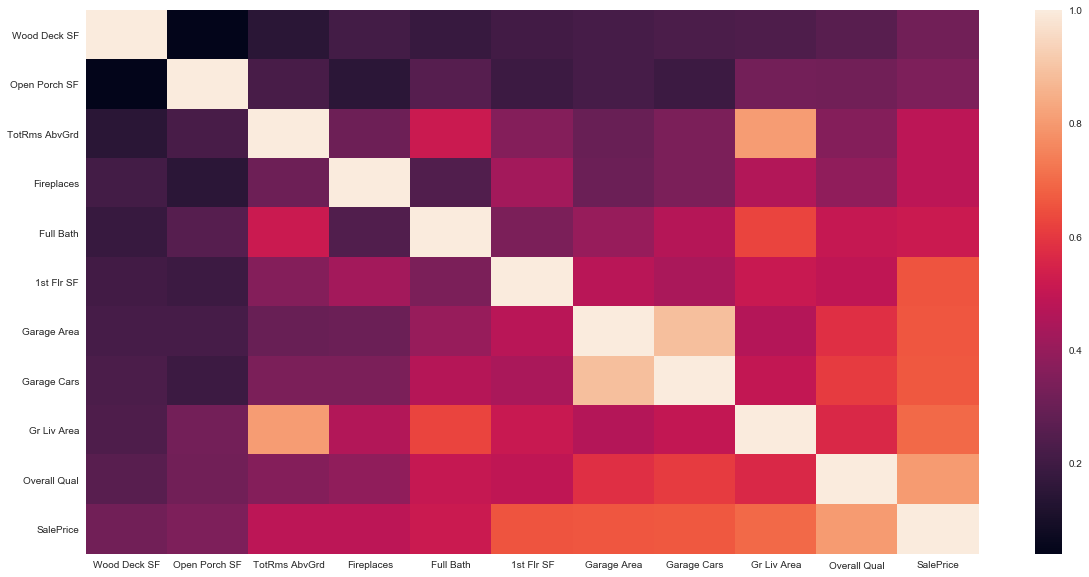

In [89]:
# Use a heatmap to identify features that strongly correlate with each other
# Exclude those that do from the final list of features to train on

sns.heatmap(train_subset[sorted_corrs[sorted_corrs > 0.3].index].corr())

In [90]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3].index
final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])


In [91]:
final_corr_cols

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual',
       'SalePrice'],
      dtype='object')

In [92]:
clean_test = test[final_corr_cols].dropna()


- Apply the training model on this narrower list of features
- Measure R2 scores - drop those with low variances (ie low predictive power)

In [93]:
features = final_corr_cols.drop(['SalePrice'])

In [94]:
target = 'SalePrice'

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
regr.fit(train[features], train['SalePrice'])

train_predictions = regr.predict(train[features])
test_predictions = regr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

34173.97629185852
41032.02612019769


In [98]:
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

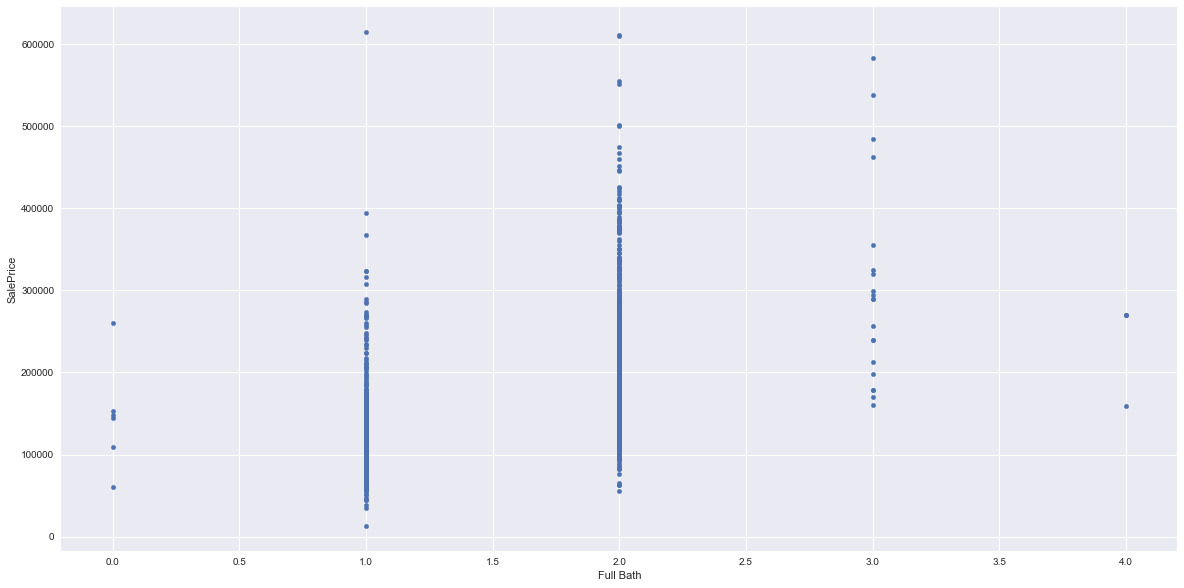

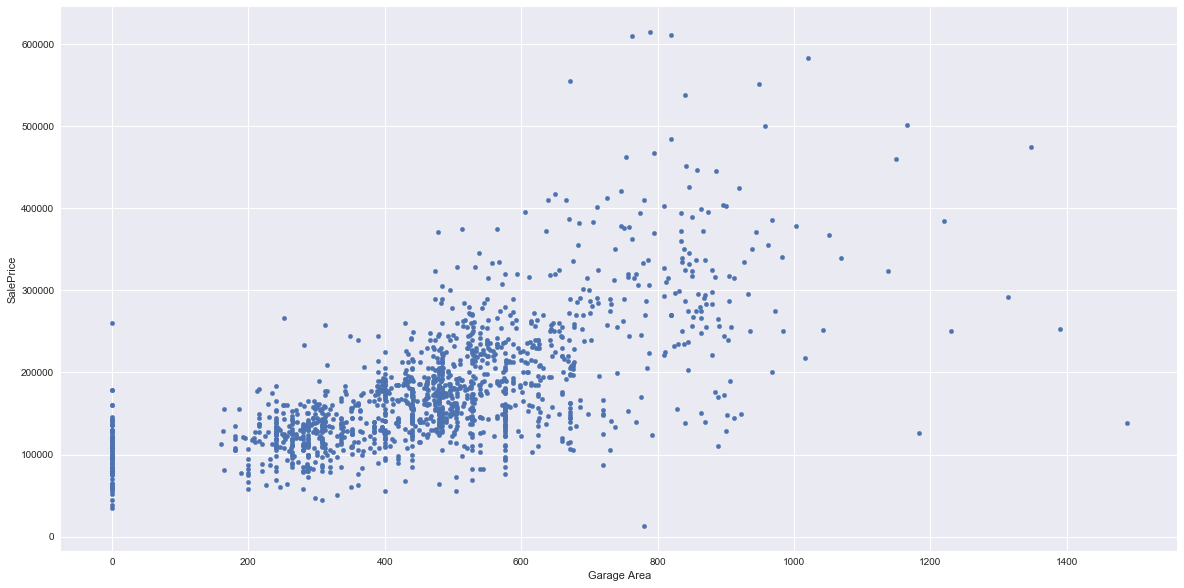

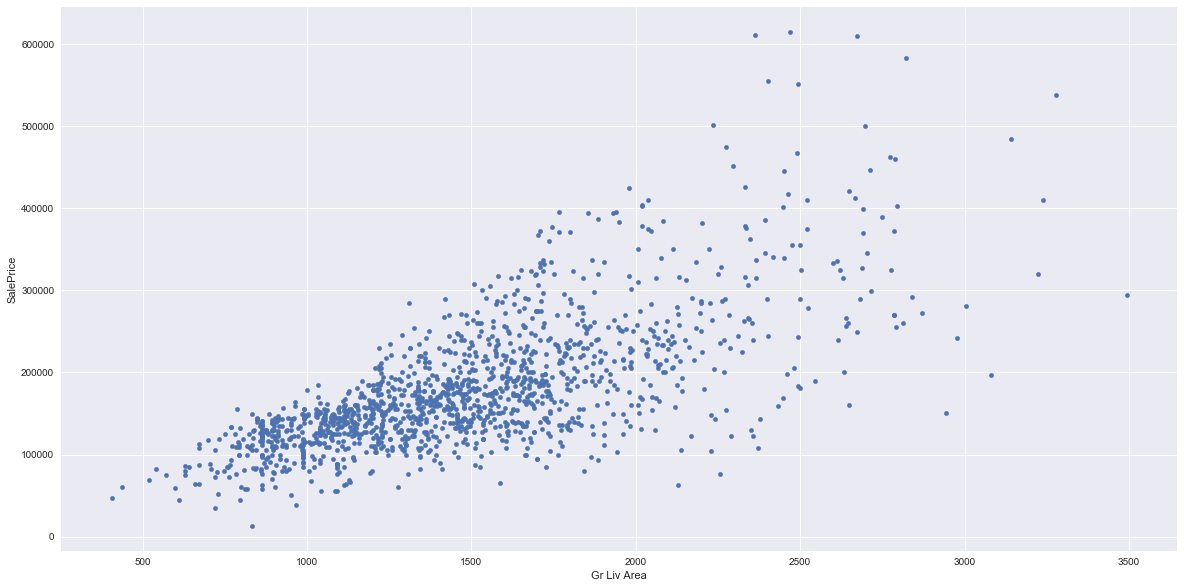

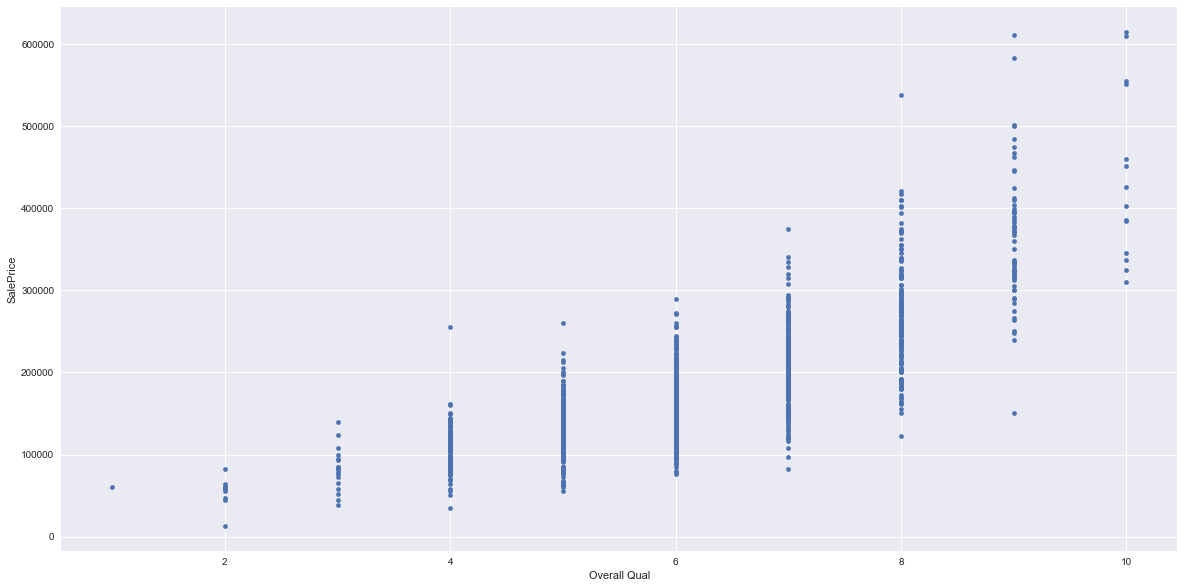

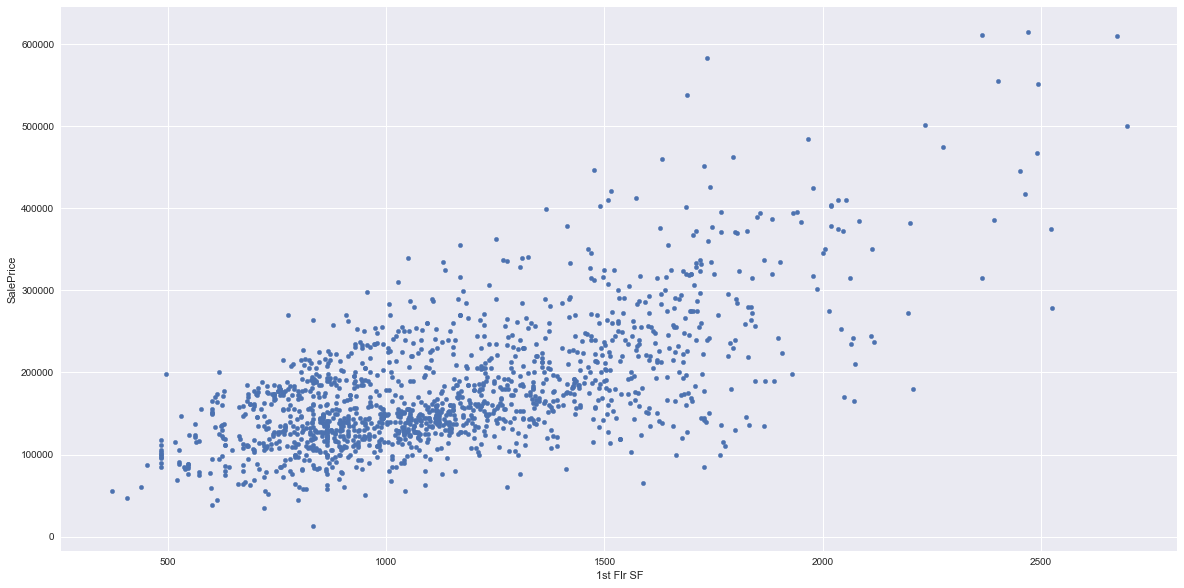

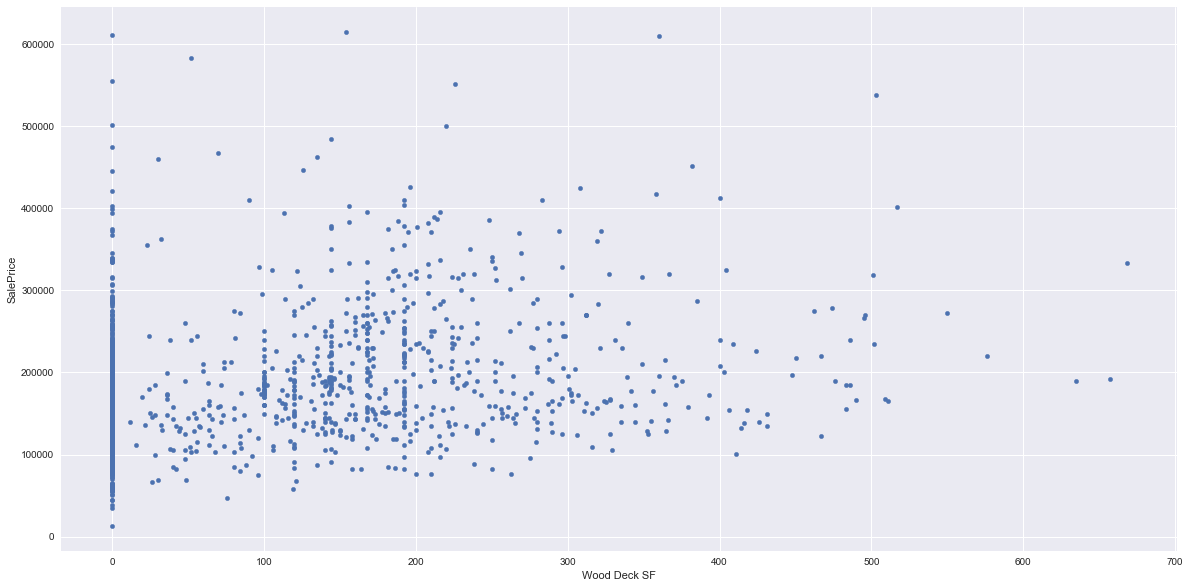

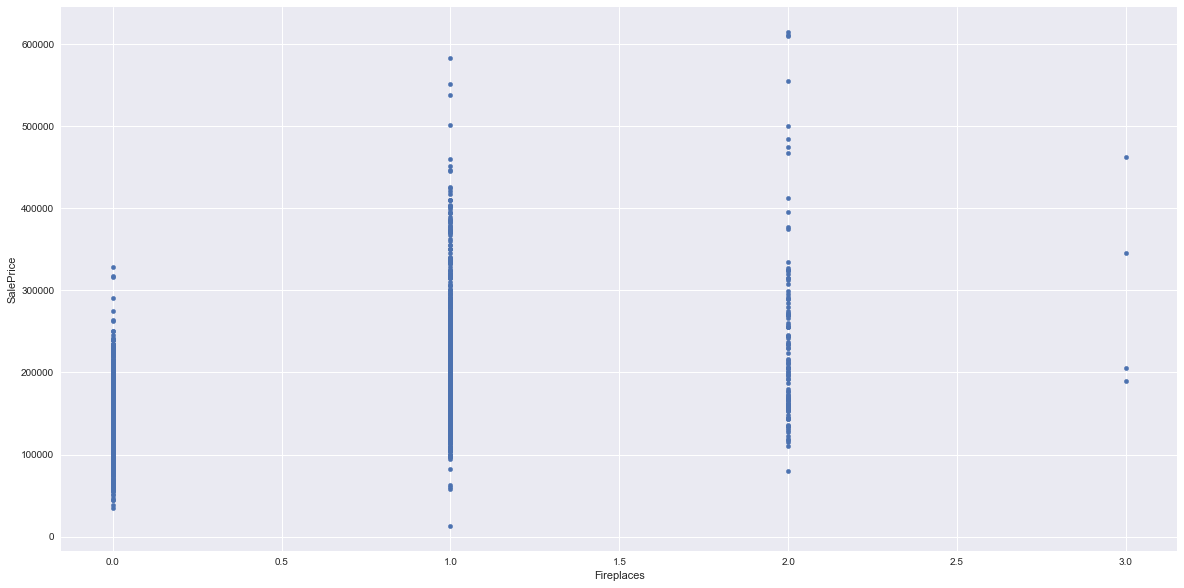

In [99]:
train.plot.scatter('Full Bath','SalePrice')
train.plot.scatter('Garage Area','SalePrice')
train.plot.scatter('Gr Liv Area','SalePrice')
train.plot.scatter('Overall Qual','SalePrice')
train.plot.scatter('1st Flr SF','SalePrice')
train.plot.scatter('Wood Deck SF','SalePrice')
train.plot.scatter('Fireplaces','SalePrice')

In [100]:
# using scikit learn approach - scikit-learn is simple machine learning library in Python
# http://scikit-learn.org/stable/
regr = LinearRegression()
regr.fit(train[features], train['SalePrice'])

train_predictions = regr.predict(train[features])
test_predictions = regr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

print("R2 score %.2f" % regr.score(clean_test[features], clean_test[target]))


34173.97629185852
41032.02612019769
R2 score 0.75


In [101]:
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [102]:
# The coefficients and intercept 
print("***Solution ***")
print("Full Bath, Garage Area, Gr Liv Area, Overall Qual, 1st Flr SF, Wood Deck SF, Fireplaces Slopes: ")
print ([ "{:0,.2f}".format(x) for x in regr.coef_ ])
print("Intercept: ")
print("{0:,.2f}".format(regr.intercept_))

***Solution ***
Full Bath, Garage Area, Gr Liv Area, Overall Qual, 1st Flr SF, Wood Deck SF, Fireplaces Slopes: 
['40.06', '61.56', '7,215.08', '-2,492.31', '43.33', '64.64', '36.95', '23,963.63']
Intercept: 
-109,308.21


In [103]:
# try dropping features again based on high coefficients or no real linear relationships, and recalculate best fit line
# try dropping 'Wood Deck SF' due to the high number of zeros - 762 instances
train['Wood Deck SF'].value_counts()[0]

762

In [104]:
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [105]:
features = features.drop(['Full Bath','Overall Qual','Fireplaces'])
features = features.drop(['Wood Deck SF'])

In [106]:
features

Index(['Open Porch SF', '1st Flr SF', 'Garage Area', 'Gr Liv Area'], dtype='object')

In [107]:
regr = LinearRegression()
regr.fit(train[features], train['SalePrice'])

train_predictions = regr.predict(train[features])
test_predictions = regr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

print("R2 score %.2f" % regr.score(clean_test[features], clean_test[target]))

42943.57465489464
52565.700385915705
R2 score 0.58


In [108]:
# The coefficients and intercept
print("Garage Area, Gr Liv Area, 1st Flr SF Slopes: ")
print ([ "{:0,.2f}".format(x) for x in regr.coef_ ])
print("Intercept: ")
print("{0:,.2f}".format(regr.intercept_))

Garage Area, Gr Liv Area, 1st Flr SF Slopes: 
['120.39', '61.54', '122.88', '60.38']
Intercept: 
-45,041.40


# Conclusions so far...

We were able to improve the RMSE value to approximately 40,591 by removing just the 'Open Porch SF' feature. Dropping additional columns whether they were linearly related to SalePrice or not actually degraded the RMSE value to 51,873. 

Dropping additional columns also lowered the R2 score from 0.75 to 0.59.

So dropping just the 'Open Porch SF' feature is most likely the furthest we can go without transforming and utilizing the other features in the dataset.




# Gradient Descent - Optimization
Alternative way to linear Regression is optimization of the MSE through the Gradient Descent algorithm that iteratively takes the slope (ie derivative) of the loss function until MSE is minimized.

- Model fitting - finding the optimal parameter (coefficient) values to minimize MSE
- Minimize MSE - through its derivative, thus its gradient descent
- More on the concept --> https://mubaris.com/2017/09/28/linear-regression-from-scratch/


In [109]:
features

Index(['Open Porch SF', '1st Flr SF', 'Garage Area', 'Gr Liv Area'], dtype='object')

In [110]:
overallcond = train['Overall Cond'].values
grlivarea = train['Gr Liv Area'].values
saleprice = train['SalePrice'].values

In [111]:
saleprice

array([215000, 105000, 172000, ..., 230000, 222500, 287000])

In [113]:
n = len(saleprice)
x0 = np.ones(n)
X = np.array([x0, overallcond, grlivarea]).T
B = np.array([0, 0, 0])
Y = np.array(saleprice)
alpha = 0.001

In [114]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J


In [115]:
cost_function(X,Y,B)

19199236669.619522

In [116]:
X.shape

(1460, 3)

In [117]:
B.shape

(3,)

In [118]:
X

array([[1.000e+00, 5.000e+00, 1.656e+03],
       [1.000e+00, 6.000e+00, 8.960e+02],
       [1.000e+00, 6.000e+00, 1.329e+03],
       ...,
       [1.000e+00, 5.000e+00, 1.852e+03],
       [1.000e+00, 5.000e+00, 2.031e+03],
       [1.000e+00, 5.000e+00, 2.263e+03]])

In [119]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [120]:
newB, cost_history = gradient_descent(X, Y, B, 0.0000001, 1000000)

In [121]:
# The coefficients and intercept
print("Intercept, Overall Condition and Gr Liv Area Slopes: ")
print ([ "{:0,.2f}".format(x) for x in newB ])


Intercept, Overall Condition and Gr Liv Area Slopes: 
['42.48', '191.12', '119.47']


In [122]:
cost_history[-1]

1570830165.7699666

In [123]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [124]:
Y_pred = X.dot(newB)
rmse(Y, Y_pred)

56050.51589004267

In [125]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [126]:
print("R2 score %.2f" %r2_score(Y, Y_pred))

R2 score 0.49


# Benchmark against scikit again
- Compare the R2 scores

In [127]:
cols = ['Overall Cond', 'Gr Liv Area']

train = data[:1460]
test = data[1460:]

x_train = train.as_matrix(columns=cols)
y_train = train['SalePrice']
x_test = test.as_matrix(columns=cols)
y_test = test['SalePrice']

regr.fit(x_train,y_train)

predic_ytrain = regr.predict(x_train)
predic_ytest = regr.predict(x_test)

print("RMSE predicted training sale price based on Overall Condition and Gr Liv Area: %.2f"
      %(np.mean((predic_ytrain - y_train) ** 2))**0.5)

print("RMSE predicted test sale price based on Overall Condition and Gr Liv Area: %.2f"
      %(np.mean((predic_ytest - y_test) ** 2))**0.5)

train_rmse_2 = (np.mean((predic_ytrain - y_train) ** 2))**0.5
test_rmse_2= (np.mean((predic_ytest - y_test) ** 2))**0.5

# The coefficients and intercept
print("")
print("Overall Condition and Gr Liv Area Slopes: ")
print ([ "{:0,.2f}".format(x) for x in regr.coef_ ])
print("Intercept: ")
print("{0:,.2f}".format(regr.intercept_))


RMSE predicted training sale price based on Overall Condition and Gr Liv Area: 56032.40
RMSE predicted test sale price based on Overall Condition and Gr Liv Area: 57066.91

Overall Condition and Gr Liv Area Slopes: 
['-409.57', '116.73']
Intercept: 
7,858.69


In [128]:
print("R2 score %.2f" %regr.score(x_test, y_test))

R2 score 0.51


# One Feature Gradient Descent

In [129]:
def derivative(a1, xi_list, yi_list):
    error = 0 #initialize error
    n = len(xi_list)
    for i in range(0,n):
            error += xi_list[i]*(a1*xi_list[i] - yi_list[i])
    deriv = error*(2/n)
    
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        print(a1, deriv)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)

# Uncomment when ready.
#param_iterations = gradient_descent(train[features], train[target], 10, .0000003, 150)
param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 10, .0000003, 38)
final_param = param_iterations[-1]

38 -401271806.60136986
158.38154198041096 186802628.45356804
102.34075344434055 -86961559.2800101
128.42922122834358 40482903.559841365
116.28435016039117 -18845861.254147705
121.93810853663548 8773246.36276603
119.30613462780568 -4084177.990265491
120.53138802488532 1901292.7674026699
119.96100019466452 -885102.0195480487
120.22653080052893 412038.37643492734


In [130]:
print("Gr Liv Area Slope: %.2f" % final_param)

Gr Liv Area Slope: 120.10


# Benchmark against scikit again


In [131]:

from sklearn.linear_model import LinearRegression
regr = LinearRegression()

train = data[:1460]
test = data[1460:]

x_train = train[['Gr Liv Area']].values
y_train = train['SalePrice']
x_test = test[['Gr Liv Area']].values
y_test = test['SalePrice']

regr.fit(x_train,y_train)
a1 = regr.coef_
a0 = regr.intercept_

# The coefficients and intercept
print("Gr Liv Area Slope: %.2f" % regr.coef_)
print("Gr Liv Area Intercept: %.2f" % regr.intercept_)

Gr Liv Area Slope: 116.87
Gr Liv Area Intercept: 5366.82


In [132]:
print("R2 score %.2f" % regr.score(x_test,y_test))

R2 score 0.51


# Normalizing using MinMax

- Experiment modeling linear regression using MinMax
- Compare the R2 score


In [133]:
features = final_corr_cols.drop(['SalePrice'])

In [134]:
features

Index(['Wood Deck SF', 'Open Porch SF', 'Fireplaces', 'Full Bath',
       '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual'],
      dtype='object')

In [135]:
dataset1 = pd.concat([train[features],train['SalePrice']],axis=1)

In [136]:
dataset1.head(5)

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
0,210,62,2,1,1656,528.0,1656,6,215000
1,140,0,0,1,896,730.0,896,5,105000
2,393,36,0,1,1329,312.0,1329,6,172000
3,0,0,2,2,2110,522.0,2110,7,244000
4,212,34,1,2,928,482.0,1629,5,189900


In [137]:
# Find the min and max values for each column
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

#dataset_minmax(dataset1)
mnmx = dataset1.apply(minMax)
mnmx

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
min,0,0,0,0,372,0.0,407,1,12789
max,668,547,3,4,2696,1488.0,3493,10,615000


In [138]:
# Normalize based on minmax
def normalize_dataset(dataset, minmax):
    retdf=pd.DataFrame()
    for col in dataset.columns:
        thecolmin = minmax[col][0]
        thecolmax = minmax[col][1]
        for i in range(dataset[col].shape[0]):
            #print(col, i,dataset[col][i],thecolmin, thecolmax, (dataset[col][i] - minmax[col][0]) / (minmax[col][1] - minmax[col][0]))
            #print (col, dataset[col][i])
            dataset.loc[i,col] = (dataset[col][i] - minmax[col][0]) / (minmax[col][1] - minmax[col][0])

In [139]:
normalize_dataset(dataset1,mnmx)

In [140]:
dataset1

,Wood Deck SF,Open Porch SF,Fireplaces,Full Bath,1st Flr SF,Garage Area,Gr Liv Area,Overall Qual,SalePrice
0,0.314371,0.113346,0.666667,0.25,0.552496,0.354839,0.404731,0.555556,0.335781
1,0.209581,0.000000,0.000000,0.25,0.225473,0.490591,0.158458,0.444444,0.153121
2,0.588323,0.065814,0.000000,0.25,0.411790,0.209677,0.298769,0.555556,0.264377
3,0.000000,0.000000,0.666667,0.50,0.747849,0.350806,0.551847,0.666667,0.383937
4,0.317365,0.062157,0.333333,0.50,0.239243,0.323925,0.395982,0.444444,0.294101
5,0.538922,0.065814,0.333333,0.50,0.238382,0.315860,0.387881,0.555556,0.303400
6,0.000000,0.000000,0.000000,0.50,0.415663,0.391129,0.301685,0.777778,0.333290
7,0.000000,0.149909,0.000000,0.50,0.390706,0.340054,0.282890,0.777778,0.296758
8,0.354790,0.277879,0.333333,0.50,0.535284,0.408602,0.391769,0.777778,0.371483
9,0.209581,0.109689,0.333333,0.50,0.282272,0.297043,0.452690,0.666667,0.292607


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train = dataset1[:1160]
test = dataset1[1160:]

regr = LinearRegression()
regr.fit(train[features], train['SalePrice'])

train_predictions = regr.predict(train[features])
test_predictions = regr.predict(test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, test[target])
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)
print("R2 score %.2f" % regr.score(test[features], test[target]))

0.0579759354537602
0.0530770718164025
R2 score 0.69


In [142]:
print("Wood Deck SF, Open Porch SF, Fireplaces, Full Bath, 1st Flr SF, Garage Area', Gr Liv Area', Overall Qual Slopes: ")
print ([ "{:0,.2f}".format(x) for x in regr.coef_ ])
print("Intercept: ")
print("{0:,.2f}".format(regr.intercept_))

Wood Deck SF, Open Porch SF, Fireplaces, Full Bath, 1st Flr SF, Garage Area', Gr Liv Area', Overall Qual Slopes: 
['0.04', '0.07', '0.03', '-0.03', '0.17', '0.15', '0.22', '0.37']
Intercept: 
-0.12
